## Import

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import isodate

## Channels

In [2]:
br_channels = read_data('Data/BRchannels.jsonl')
us_channels = read_data('Data/USchannels.jsonl')

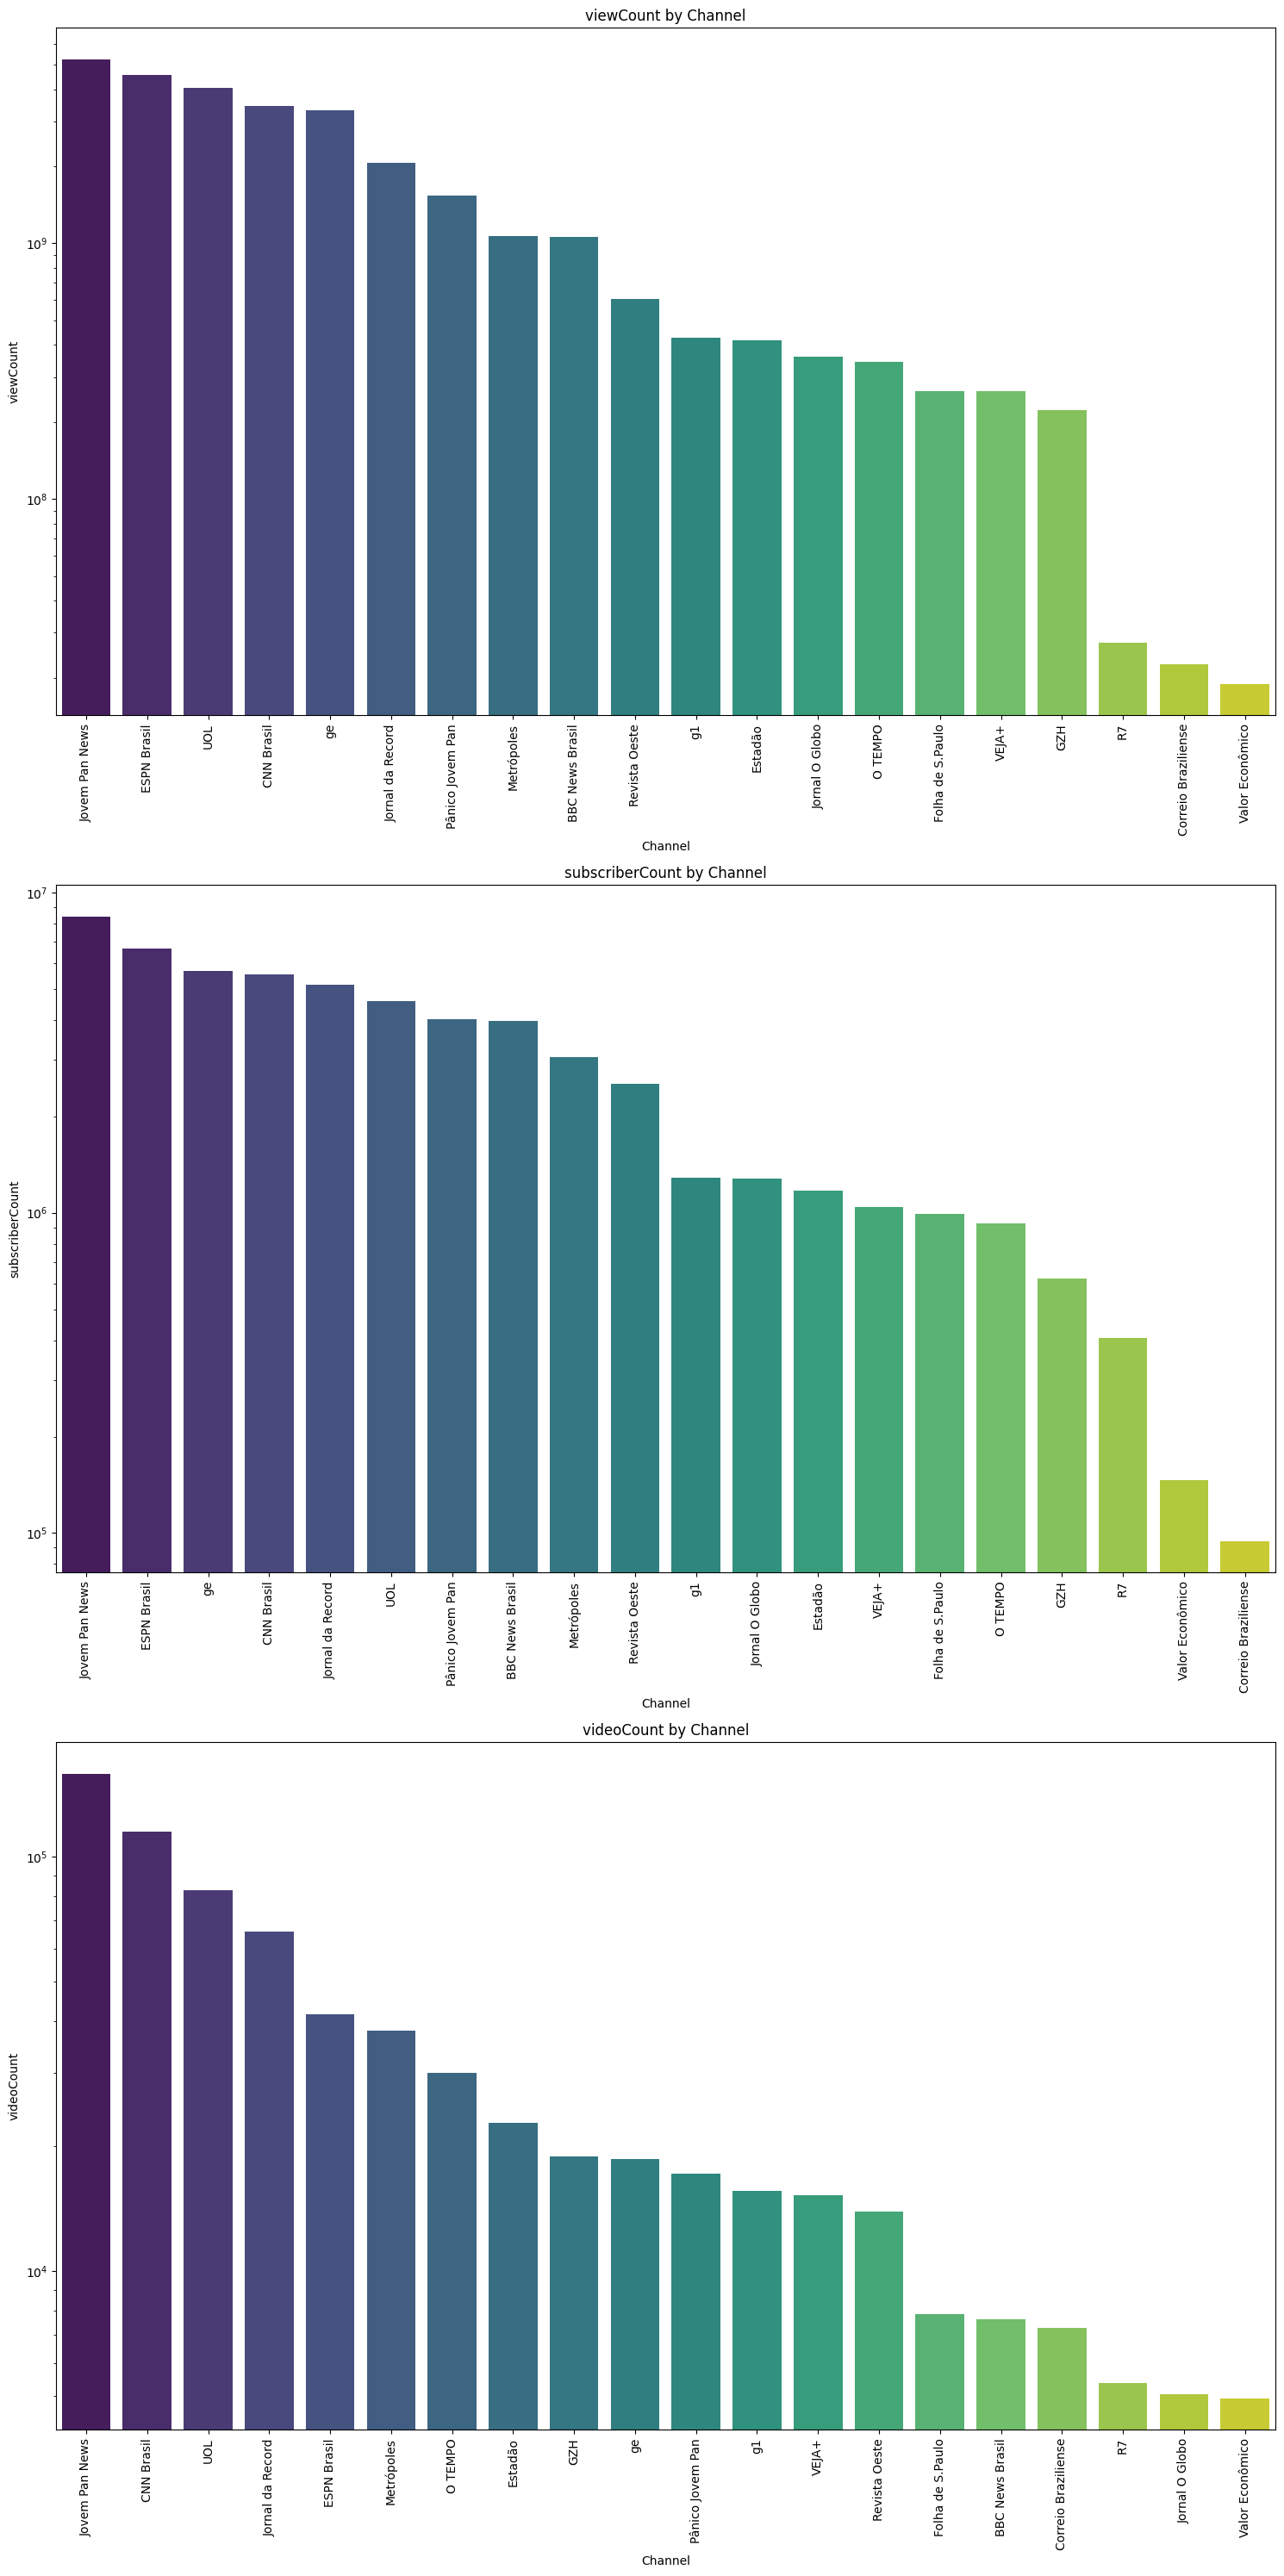

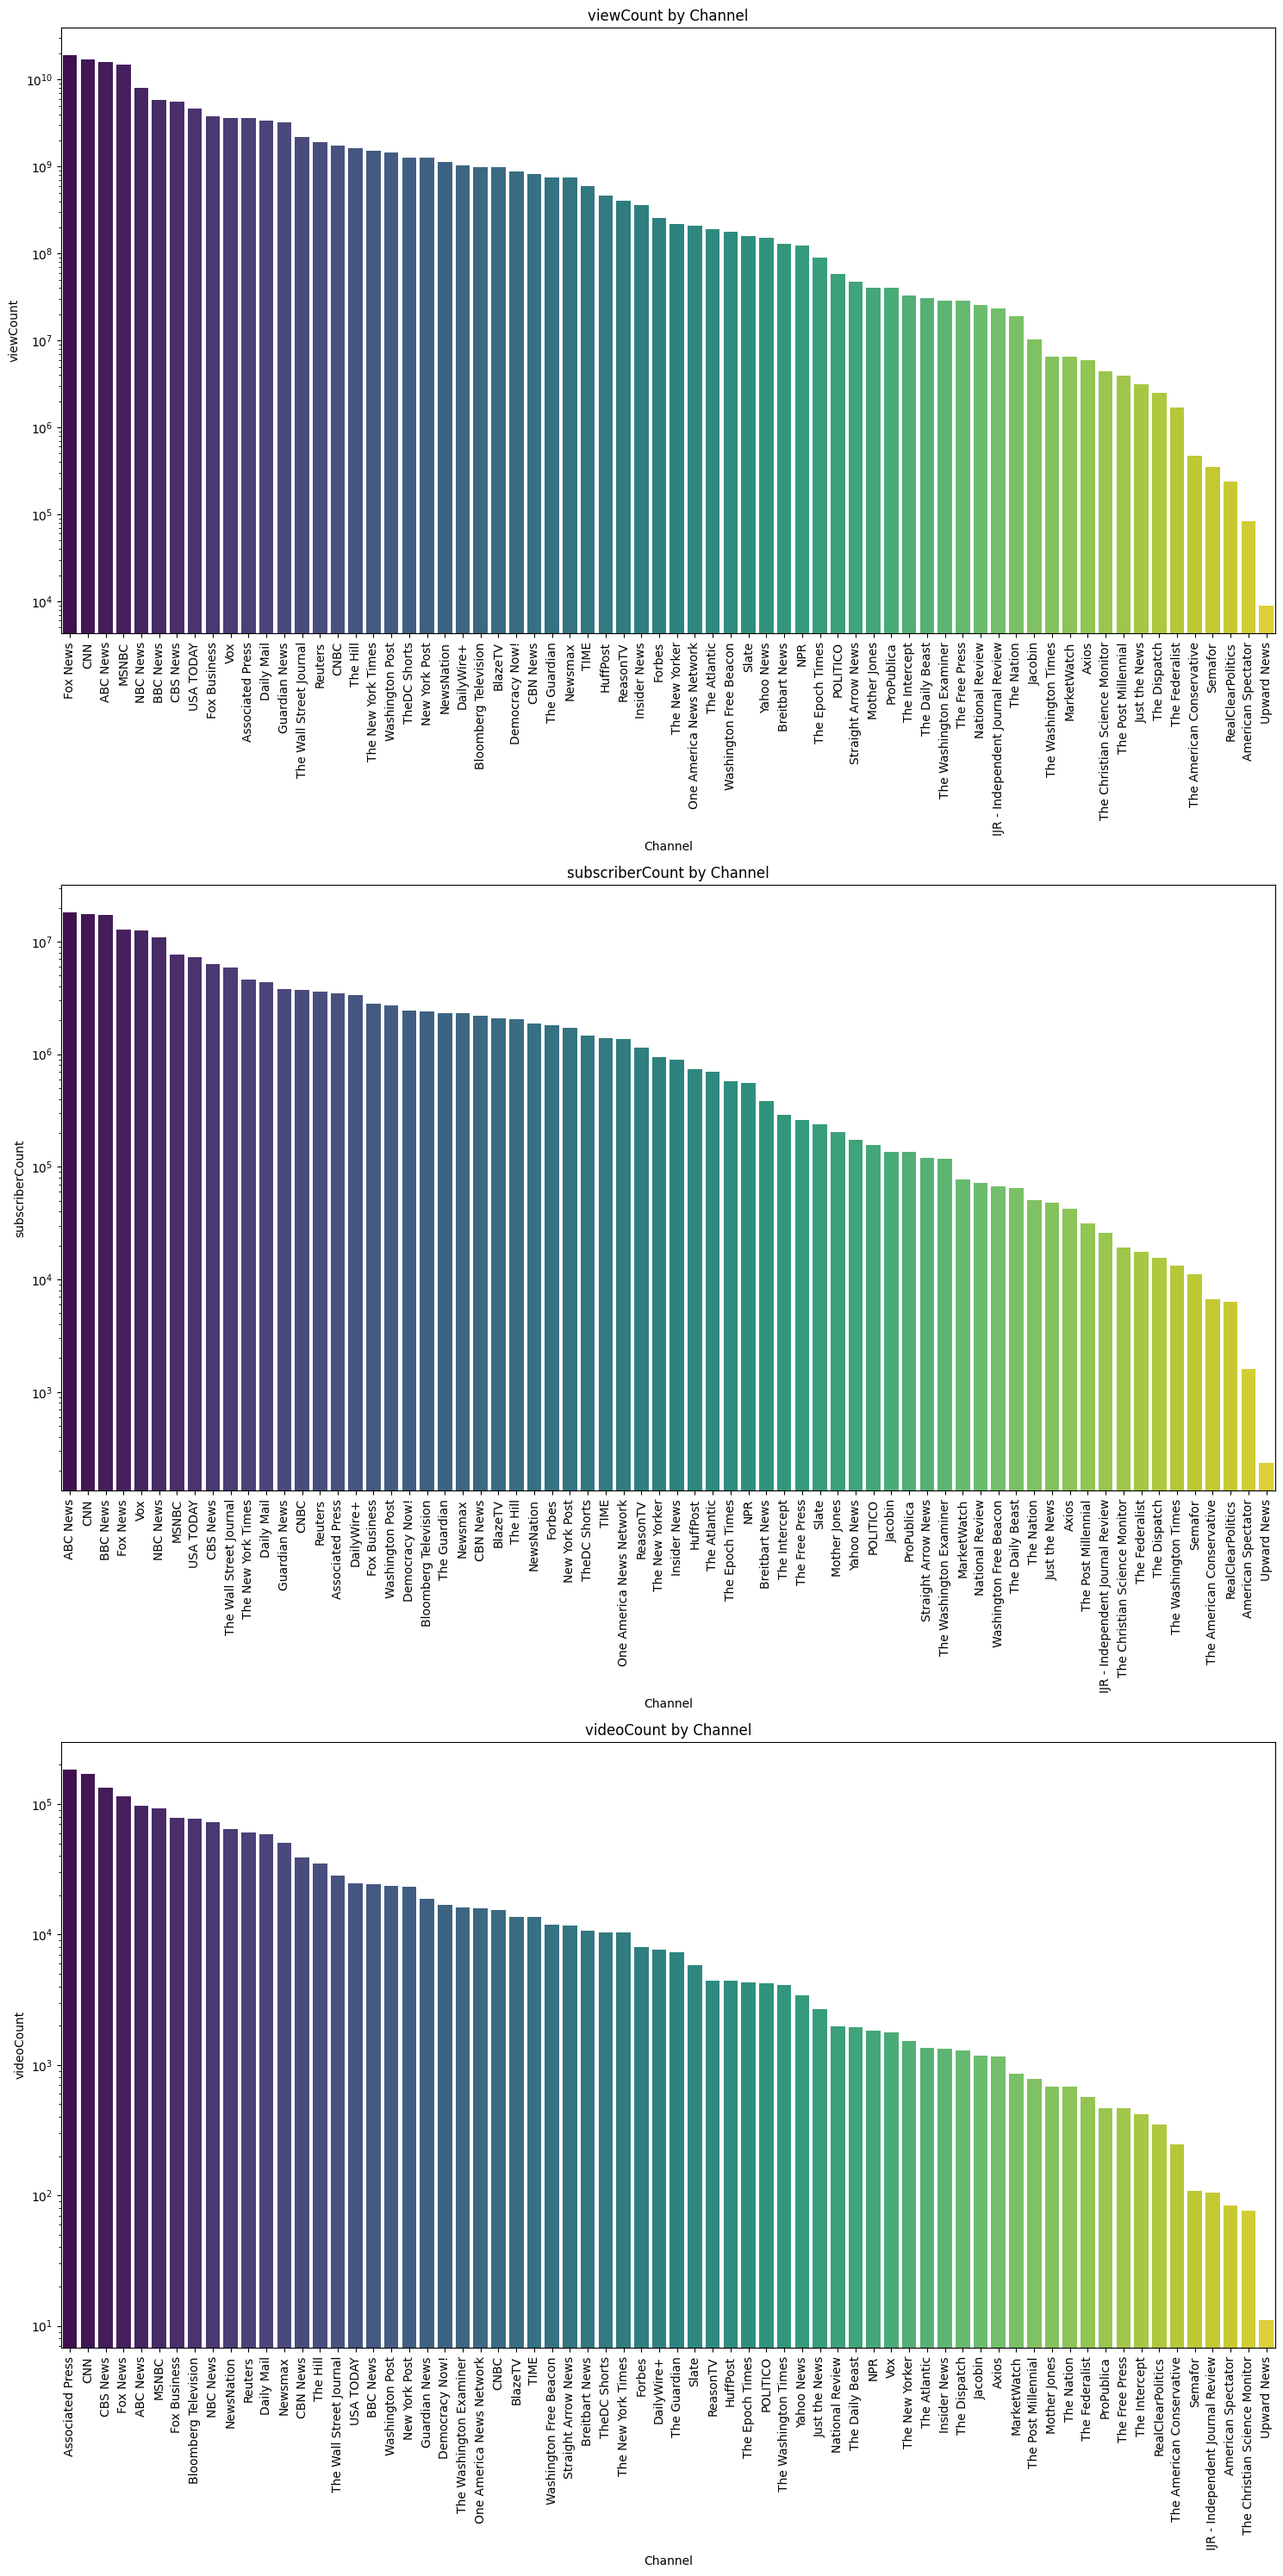

In [3]:
y_cols = ['viewCount','subscriberCount','videoCount']
x_col = 'Title'
barplot(br_channels,y_cols,x_col,'Channel')
barplot(us_channels,y_cols,x_col,'Channel')

## Videos

In [4]:
br_videos = read_data('Data/BRvideos_.jsonl')
us_videos = read_data('Data/USvideos_.jsonl')

In [5]:
terms = ['Generative AI','Bard','OpenAI','Gemini','Aprendizado de Máquina','AI','Deep learning','AI Research','Tendências em IA',
'AI trends','Redes neurais','DALL-E','IA','Copilot','Midjourney','IA Generativa','Stable Diffusion',
'Artificial Intelligence','Anthropic','ChatGPT','LLM','Inteligência Artificial','Sora','GPT',
'Tecnologia de IA','Aprendizado Profundo','Machine Learning','Neural networks','Prompt','Claude','DeepSeek','AI Technology','Pesquisa em IA']


### Filtering

In [6]:
def plot_term_histogram(data, terms):
    # Converter títulos para string (caso tenha valores NaN)
    data["Title"] = data["Title"].astype(str).str.lower()

    # Criar dicionário para contar ocorrências de cada termo
    term_counts = {
        term: data["Title"].str.contains(r'\b' + re.escape(term.lower()) + r'\b', regex=True).sum()
        for term in terms
    }

    # Criar DataFrame com os resultados e ordenar
    term_df = pd.DataFrame(term_counts.items(), columns=["Term", "Count"]).sort_values(by="Count", ascending=False)

    # Configurar estilo do gráfico
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # Criar o gráfico de barras
    sns.barplot(y=term_df["Term"], x=term_df["Count"], palette="viridis")

    # Configurar rótulos e título
    plt.xlabel("Number of Appearances", fontsize=12)
    plt.ylabel("Term", fontsize=12)
    plt.title("Term Frequency in Video Titles", fontsize=14, fontweight="bold")

    # Exibir o gráfico
    plt.show()

In [8]:
us_filtered  = filter_videos(us_videos,terms)
br_filtered  = filter_videos(br_videos,terms)

In [9]:
print("Total of videos in Portuguese:" ,len(br_videos))
print("Total of videos in English:",len(us_videos))
print("Total of videos filtered in Portuguese:" ,len(br_filtered))
print("Total of videos filtered in English:",len(us_filtered))

Total of videos in Portuguese: 11009
Total of videos in English: 29480
Total of videos filtered in Portuguese: 52
Total of videos filtered in English: 271


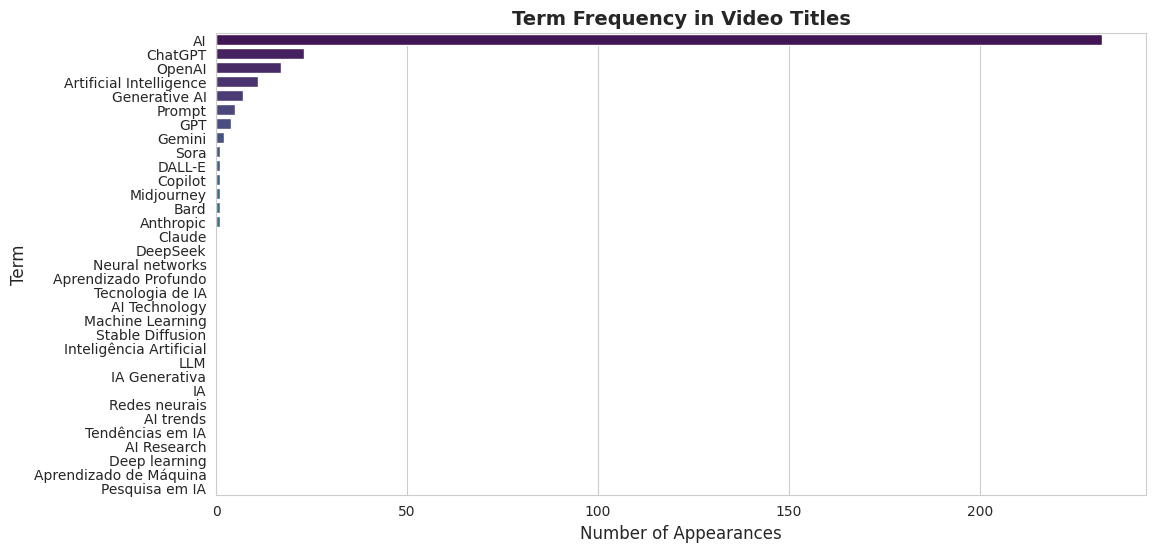

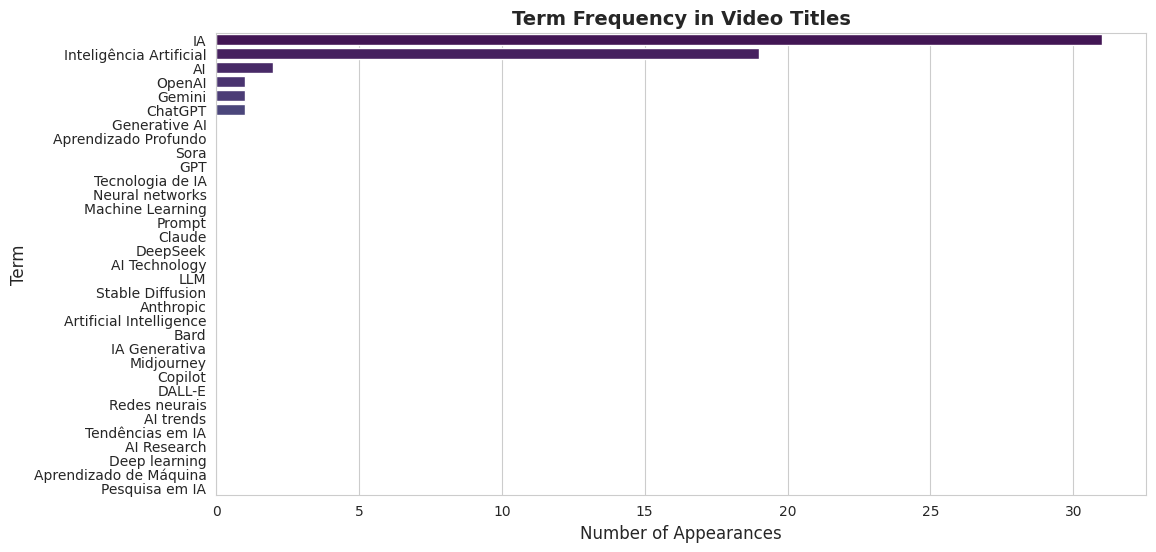

In [10]:
plot_term_histogram(us_filtered,terms)
plot_term_histogram(br_filtered,terms)

### Wordcloud

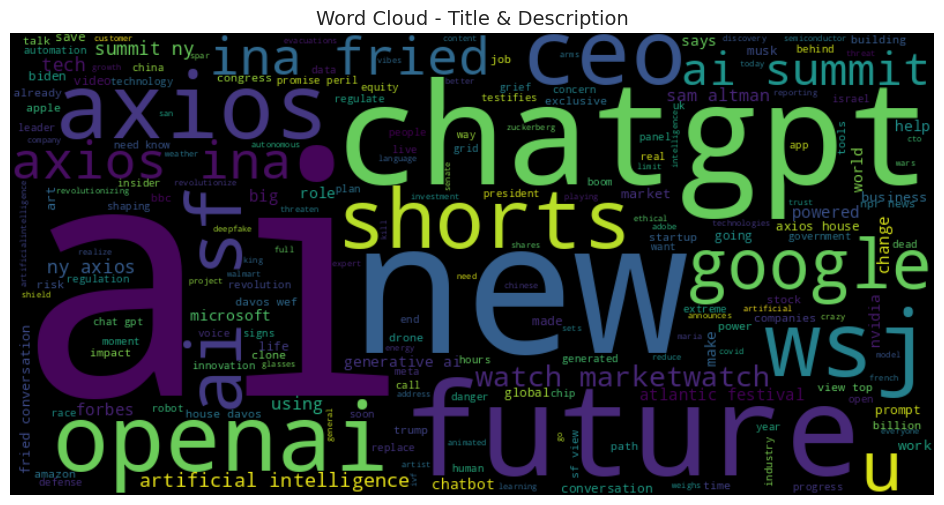

In [11]:
generate_wordcloud(us_filtered)


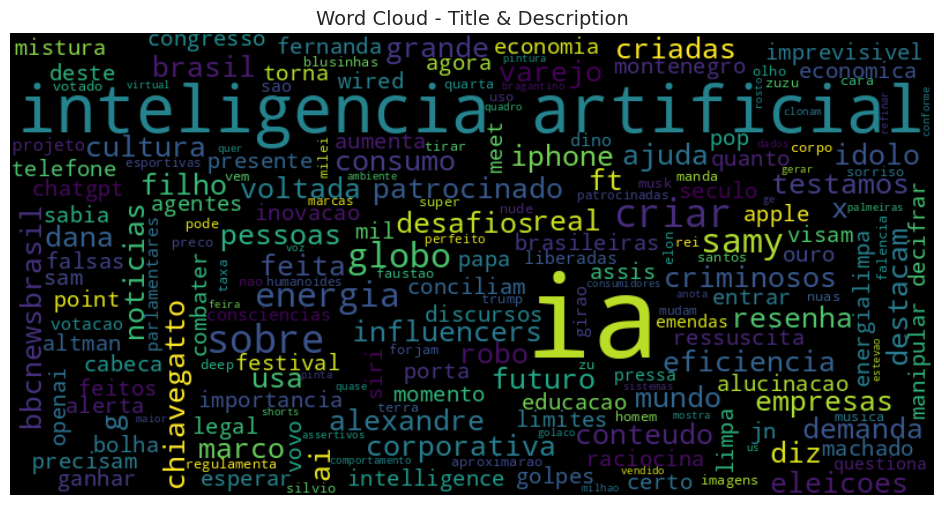

In [12]:
generate_wordcloud(br_filtered) 

### Duration


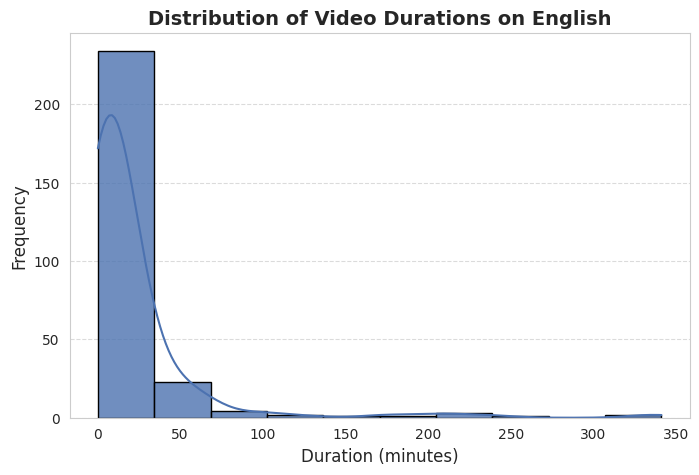

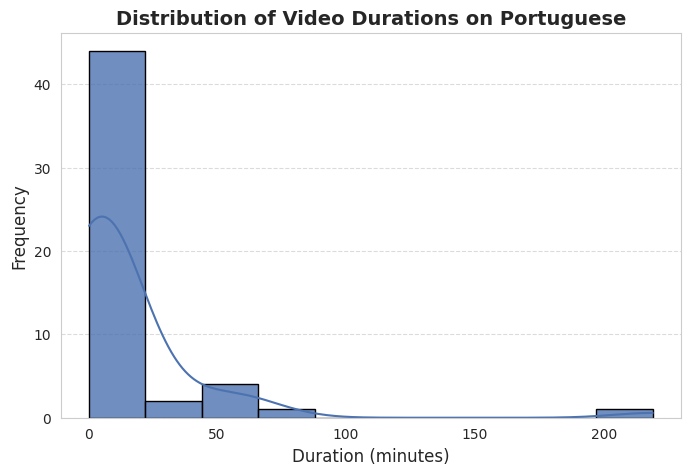

In [13]:
generate_duration_histogram(us_filtered,'English')
generate_duration_histogram(br_filtered,'Portuguese')

### Year

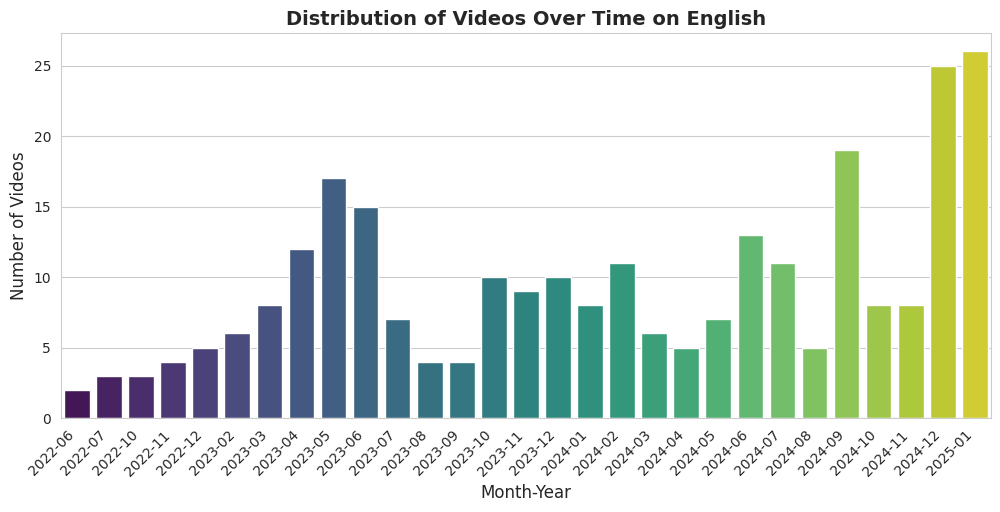

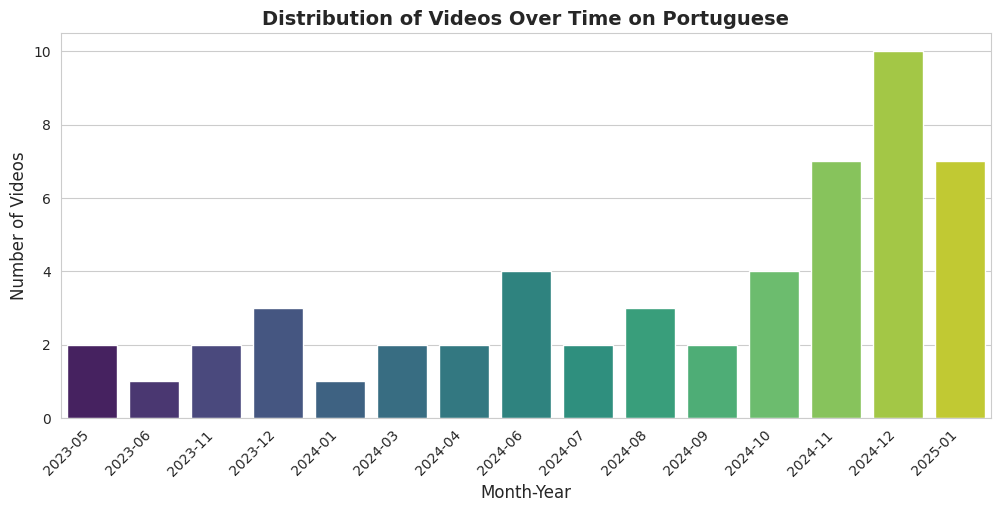

In [14]:
generate_month_year_barplot(us_filtered,"English")
generate_month_year_barplot(br_filtered,"Portuguese")


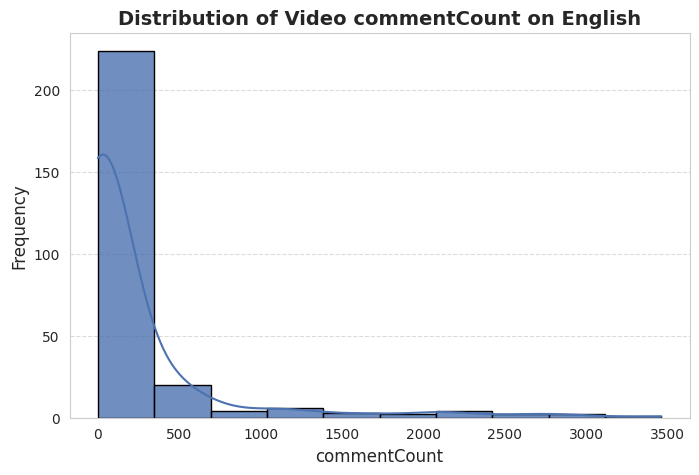

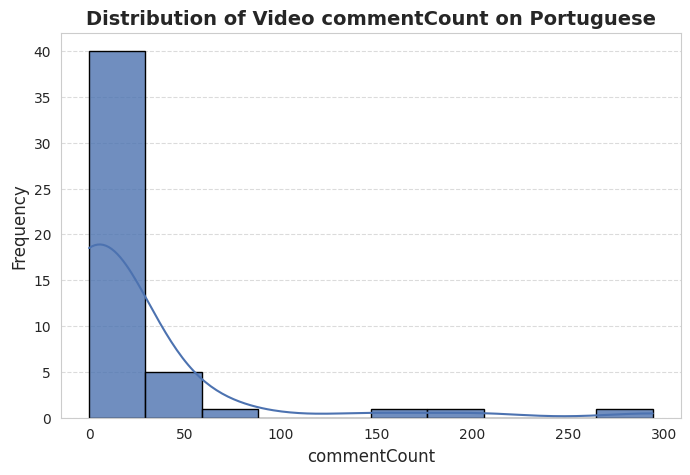

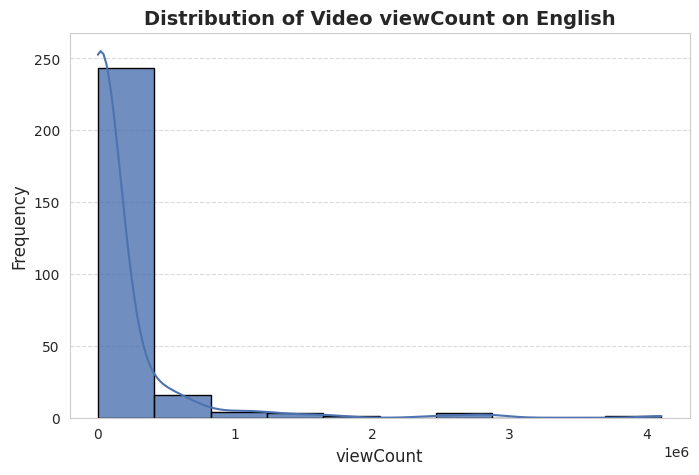

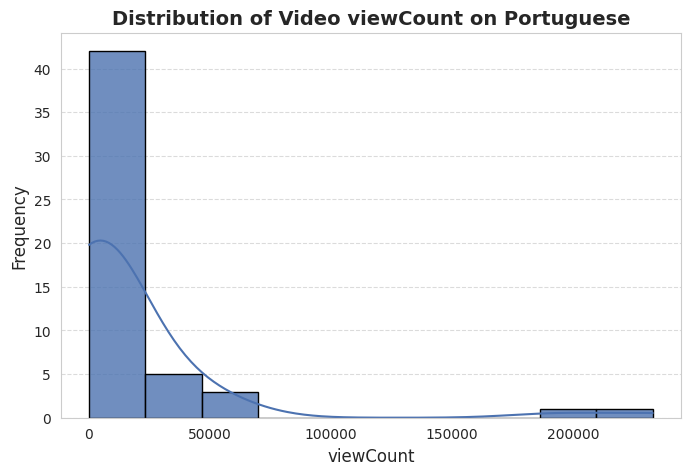

In [15]:
generate_histogram(us_filtered,'commentCount','English')
generate_histogram(br_filtered,'commentCount','Portuguese')
generate_histogram(us_filtered,'viewCount','English')
generate_histogram(br_filtered,'viewCount','Portuguese')